In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['mnist_train.csv', 'mnist_test.csv']


In [2]:
#Loading and exploring the MNIST data set
train_data_path = '../input/mnist_train.csv'
test_data_path = '../input/mnist_test.csv'
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

print(train_data.head())

   5  0  0.1  0.2  0.3  0.4  ...    0.612  0.613  0.614  0.615  0.616  0.617
0  0  0    0    0    0    0  ...        0      0      0      0      0      0
1  4  0    0    0    0    0  ...        0      0      0      0      0      0
2  1  0    0    0    0    0  ...        0      0      0      0      0      0
3  9  0    0    0    0    0  ...        0      0      0      0      0      0
4  2  0    0    0    0    0  ...        0      0      0      0      0      0

[5 rows x 785 columns]


In [3]:
import matplotlib
import matplotlib.pyplot as plt
from random import randint

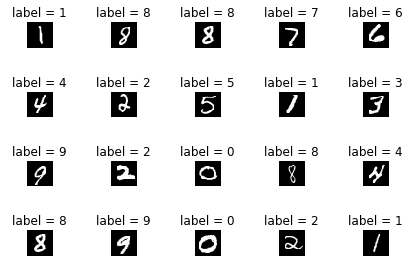

In [4]:
ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    random_position = randint(0,60000)
    image = train_data.values[random_position][1:].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(train_data.values[random_position][0]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

In [5]:
X_train = train_data.values[:,1:]
y_train = train_data.values[:,0]
X_test = test_data.values[:,1:]
y_test = test_data.values[:,0]

img_rows = 28
img_cols = 28
num_classes = 10

print(train_data.values[:,1:].shape)
num_images = X_train.shape[0]
x_shaped_array = X_train.reshape(num_images, img_rows, img_cols, 1)
out_x = x_shaped_array / 255
print(out_x.shape)


(59999, 784)
(59999, 28, 28, 1)


In [6]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

In [7]:

my_model = Sequential()
my_model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1),data_format="channels_last"))
my_model.add(Conv2D(128, kernel_size=2, activation='relu', data_format="channels_last"))
my_model.add(Conv2D(64, kernel_size=2, activation='relu', data_format="channels_last"))
my_model.add(Conv2D(32, kernel_size=2, activation='relu', data_format="channels_last"))
my_model.add(Conv2D(16, kernel_size=2, activation='relu', data_format="channels_last"))
my_model.add(Flatten())
my_model.add(Dense(128, activation='relu'))
my_model.add(Dense(num_classes, activation='softmax'))

my_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
my_model.fit(out_x, y_train,
          batch_size=128,
          epochs=8,
          validation_split = 0.1)

Instructions for updating:
Colocations handled automatically by placer.
Train on 53999 samples, validate on 6000 samples
Epoch 1/8
53999/53999 [==============================] - 256s 5ms/sample - loss: 0.1677 - acc: 0.9504 - val_loss: 0.0589 - val_acc: 0.9837
Epoch 2/8
53999/53999 [==============================] - 257s 5ms/sample - loss: 0.0424 - acc: 0.9865 - val_loss: 0.0479 - val_acc: 0.9862
Epoch 3/8
53999/53999 [==============================] - 257s 5ms/sample - loss: 0.0238 - acc: 0.9923 - val_loss: 0.0525 - val_acc: 0.9853
Epoch 4/8
53999/53999 [==============================] - 257s 5ms/sample - loss: 0.0155 - acc: 0.9946 - val_loss: 0.0666 - val_acc: 0.9845
Epoch 5/8
53999/53999 [==============================] - 257s 5ms/sample - loss: 0.0108 - acc: 0.9964 - val_loss: 0.0533 - val_acc: 0.9888
Epoch 6/8
53999/53999 [==============================] - 256s 5ms/sample - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0549 - val_acc: 0.9892
Epoch 7/8
53999/53999 [======================

In [8]:
print(X_train.shape)
print(y_train[:].shape)
num_images_test = X_test.shape[0]
x_shaped_array_test = X_test.reshape(num_images_test, img_rows, img_cols, 1)
out_x_test = x_shaped_array_test / 255

(59999, 784)
(59999,)


In [9]:
predictions = my_model.predict(out_x_test)

In [10]:
print(predictions.shape)

(9999, 10)


In [11]:
predicted_labels = np.argmax(predictions, axis=1)

In [12]:
model_accuracy = len(y_test[y_test == predicted_labels]) / len(predicted_labels)
print(model_accuracy)

0.9890989098909891


In [15]:
predictions_path = '..predictions.csv'
pd.DataFrame(predicted_labels).to_csv(predictions_path, header=None, index=None)
